In [1]:
import pandas as pd
import os

In [2]:
df_snv_counts = pd.read_csv("../data/williams/signatures_dataset/DLP/SNV/snv_counts.csv.gz", low_memory=False)

In [3]:
df_cn_clones = pd.read_csv("../data/williams/signatures_dataset/DLP/CNA/hscn_clones.csv.gz")

In [4]:
patient_ids = df_snv_counts['patient'].unique().tolist()

In [5]:
ROOT_DIR = "../outputs/scope/williams"

In [6]:
import os
import re
import pandas as pd

records = []

for patient_id in patient_ids:
    patient_path = os.path.join(ROOT_DIR, patient_id)

    for k in range(10, 21):
        base_dir = os.path.join(patient_path, "solutions_mut", f"k_{k}")
        summary_file = os.path.join(base_dir, "summary.txt")

        solution_count = 0
        num_mut = 0

        if os.path.exists(summary_file):
            with open(summary_file, "r") as f:
                text = f.read()

            m = re.search(r"#UNIQUE SOLUTIONS:\s*(\d+)\s*WITH VALUE\s*([\d\.]+)", text)
            if m:
                solution_count = int(m.group(1))
                num_mut = float(m.group(2))

                records.append({
                    "patient": patient_id,
                    "k": k,
                    "solution_count": solution_count,
                    "num_mutations_selected": num_mut
                })

solution_count_df = pd.DataFrame(records)
solution_count_df

solution_count_df = (
    solution_count_df.sort_values(["patient", "num_mutations_selected"], ascending=[True, False])
      .drop_duplicates(subset="patient", keep="first")
      .reset_index(drop=True)
)
solution_count_df

,patient,k,solution_count,num_mutations_selected
0,SA1050,14,4,18241.0
1,SA1052,14,1,25769.0
2,SA1091,16,2,6276.0
3,SA1093,10,6,12857.0
4,SA1162,15,1,13132.0
5,SA1180,14,2,3979.0
6,SA1181,11,1,6652.0
7,SA1184,11,4,4521.0
8,SA501,10,48,18625.0
9,SA530,10,1,10631.0


In [7]:
df = df_snv_counts
df['mutation'] = df['chr'].astype(str) + ":" + df["start"].astype(str) + ":" + df["ref"] + ":" + df["alt"]


In [8]:
mut_counts = (
    df.groupby('patient')['mutation']
      .nunique()
      .reset_index(name='unique_mutations')
)
mut_counts

,patient,unique_mutations
0,DG1134,15642
1,DG1197,14306
2,OV2295,24092
3,SA039,2478
4,SA1035,35318
5,SA1047,3414
6,SA1049,21095
7,SA1050,27266
8,SA1051,25887
9,SA1052,38881


In [9]:
cell_counts = (
    df.groupby('patient')['cell_id']
      .nunique()
      .reset_index(name='unique_cell_id')
)
cell_counts

,patient,unique_cell_id
0,DG1134,113
1,DG1197,77
2,OV2295,1084
3,SA039,1959
4,SA1035,2586
5,SA1047,347
6,SA1049,1283
7,SA1050,990
8,SA1051,892
9,SA1052,556


In [10]:
cn_counts = (
    df_cn_clones.groupby('patient')['clone_id']
      .nunique()
      .reset_index(name='unique_clone_id')
)
cn_counts

,patient,unique_clone_id
0,DG1134,7
1,DG1197,3
2,OV2295,8
3,SA039,8
4,SA1035,11
5,SA1047,2
6,SA1049,8
7,SA1050,8
8,SA1051,3
9,SA1052,8


In [11]:
patient_ids_ = []
cn_clusters_with_reads = []
for patient_id in patient_ids:
    try:
        F_hi = pd.read_csv(f"../data/williams/scratch/{patient_id}/F_hi.csv")
        patient_ids_.append(patient_id)
        cn_clusters_with_reads.append(F_hi.shape[0])
    except Exception as e:
        print(e)

cn_clusters_with_reads = pd.DataFrame({
    'patient': patient_ids_,
    'cn_clusters_with_reads': cn_clusters_with_reads
})

cn_clusters_with_reads

[Errno 2] No such file or directory: '../data/williams/scratch/SA1135/F_hi.csv'


,patient,cn_clusters_with_reads
0,SA604,14
1,SA609,12
2,OV2295,8
3,DG1134,7
4,DG1197,3
5,SA501,7
6,SA530,3
7,SA1182,2
8,SA1184,8
9,SA1142,2


In [12]:
patient_ids_ = []
cn_clusters_taken = []
num_cn_clusters_taken = []

for patient_id in patient_ids:
    try:
        cn_cell_df = pd.read_csv(f"../data/williams/signatures_dataset/clones_trees/{patient_id}_clones.tsv", sep='\t')

        counts = cn_cell_df['clone_id'].value_counts()
        proportions = counts / counts.sum()

        n_clusters = len(cn_cell_df['clone_id'].unique())

        threshold = (1 / 3) * (1 / n_clusters)
        filtered = proportions[proportions > threshold]
        if len(filtered) <= 3:
            threshold = (1 / 5) * (1 / n_clusters)
            filtered = proportions[proportions > threshold]

        filtered = filtered.sort_index().index.to_list()

        print(patient_id, filtered)

        patient_ids_.append(patient_id)
        cn_clusters_taken.append(" ".join(filtered))
        num_cn_clusters_taken.append(len(filtered))
    
    except Exception as e:
        print(e)

cn_clusters_taken = pd.DataFrame({
    'patient': patient_ids_,
    'cn_clusters_in_solution': cn_clusters_taken,
    'num_cn_clusters_in_solution': num_cn_clusters_taken
})

cn_clusters_taken

SA604 ['A', 'B', 'C', 'K', 'M', 'N']
SA609 ['C', 'E', 'G', 'H', 'J', 'M', 'O']
OV2295 ['B', 'C', 'D', 'E', 'F', 'G', 'H']
DG1134 ['A', 'B', 'C', 'D', 'E', 'F', 'G']
DG1197 ['A', 'B', 'C']
SA501 ['A', 'B', 'D', 'G']
SA530 ['A', 'B', 'C']
SA1182 ['A', 'B']
SA1184 ['A', 'B', 'C', 'D', 'E', 'F', 'G']
SA1142 ['B']
SA1162 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
SA1180 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']
SA1091 ['A', 'B', 'C', 'D', 'E']
SA1093 ['A', 'B', 'C', 'D']
SA1096 ['A', 'B', 'C', 'G']
SA1035 ['A', 'B', 'C', 'D', 'H', 'J', 'K']
SA1047 ['B']
SA1049 ['A', 'C', 'D', 'G', 'H']
SA1050 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
SA1051 ['A', 'B']
SA1052 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
SA1053 ['B', 'D', 'E', 'F', 'G']
SA535 ['B', 'D', 'E', 'G', 'I', 'N', 'O', 'Q']
SA610 ['A', 'B']
SA605 ['A', 'B']
SA1181 ['A', 'B', 'C', 'D', 'E', 'F']
'clone_id'
SA039 ['B', 'C', 'D', 'E', 'F']
SA906a ['A', 'B', 'C', 'D', 'E', 'F', 'J', 'L']
SA906b ['B', 'C', 'E', 'G', 'H', 

,patient,cn_clusters_in_solution,num_cn_clusters_in_solution
0,SA604,A B C K M N,6
1,SA609,C E G H J M O,7
2,OV2295,B C D E F G H,7
3,DG1134,A B C D E F G,7
4,DG1197,A B C,3
5,SA501,A B D G,4
6,SA530,A B C,3
7,SA1182,A B,2
8,SA1184,A B C D E F G,7
9,SA1142,B,1


In [13]:
total_reads_per_patient = (
    df.groupby('patient')['total_counts']
      .sum()
      .rename('total_reads')
)

total_reads_per_patient

patient
DG1134     280227
DG1197     194574
OV2295    3221337
SA039      118796
SA1035    2596866
SA1047     147282
SA1049    1396643
SA1050    1825302
SA1051    2346145
SA1052    1372756
SA1053    1661168
SA1054     775136
SA1055     652223
SA1056     670716
SA1091     390208
SA1093     534173
SA1096     435313
SA1135      36547
SA1142    4522246
SA1162     263695
SA1180     350927
SA1181     354350
SA1182     122835
SA1184     281554
SA1188    2138359
SA1292     144079
SA501     2236604
SA530      527965
SA535     1796109
SA604     1565653
SA605       55573
SA609     4943221
SA610      158840
SA906a    3190410
SA906b    4928094
Name: total_reads, dtype: int64

In [14]:
def get_loh_restriction_pairs(SAMPLE_ID):

    PATH = f"../outputs/scope/williams/{SAMPLE_ID}"

    loh_count_threshold = 50

    cn_cell_df = pd.read_csv(f"../data/williams/signatures_dataset/clones_trees/{SAMPLE_ID}_clones.tsv", sep='\t')

    loh_conflicts = pd.read_csv(f"{PATH}/loh_conflicts.csv", index_col=0)
    loh_conflicts = (loh_conflicts > loh_count_threshold).astype(int)

    counts = cn_cell_df['clone_id'].value_counts()
    proportions = counts / counts.sum()

    n_clusters = len(cn_cell_df['clone_id'].unique())

    threshold = (1 / 3) * (1 / n_clusters)
    filtered = proportions[proportions > threshold]
    if len(filtered) <= 3:
        threshold = (1 / 5) * (1 / n_clusters)
        filtered = proportions[proportions > threshold]

    filtered = filtered.sort_index().index.to_list()

    F_hi = pd.read_csv(f"{PATH}/mutation_clusters/k_10/F_plus.csv", index_col=0)
    F_lo = pd.read_csv(f"{PATH}/mutation_clusters/k_10/F_minus.csv", index_col=0)

    filtered_existing = [f for f in filtered if f in F_hi.index and f in F_lo.index]

    loh_conflicts = (
        loh_conflicts
        .reindex(index=filtered_existing, columns=filtered_existing, fill_value=0)
    )

    return loh_conflicts

In [15]:
mean_lohs = []
total_pairs_all = []
total_restrictions_all = []
patient_ids_ = []

for patient_id in patient_ids:
    try:
        loh_conflicts = get_loh_restriction_pairs(patient_id)
        total_pairs = loh_conflicts.shape[0] * loh_conflicts.shape[1]
        total_restrictions = loh_conflicts.sum().sum()


        total_pairs_all.append(total_pairs)
        total_restrictions_all.append(total_restrictions)

        mean_lohs.append(total_restrictions / total_pairs)

        patient_ids_.append(patient_id)
        
    except Exception as e:
        print(e)

lohs_df = pd.DataFrame({
    'patient': patient_ids_,
    'mean_loh': mean_lohs,
    'total_pairs': total_pairs_all,
    'total_restrictions': total_restrictions_all,
})

lohs_df

[Errno 2] No such file or directory: '../outputs/scope/williams/SA604/mutation_clusters/k_10/F_plus.csv'
[Errno 2] No such file or directory: '../outputs/scope/williams/OV2295/mutation_clusters/k_10/F_plus.csv'
[Errno 2] No such file or directory: '../outputs/scope/williams/DG1134/mutation_clusters/k_10/F_plus.csv'
[Errno 2] No such file or directory: '../outputs/scope/williams/DG1197/mutation_clusters/k_10/F_plus.csv'
[Errno 2] No such file or directory: '../outputs/scope/williams/SA1182/mutation_clusters/k_10/F_plus.csv'
[Errno 2] No such file or directory: '../outputs/scope/williams/SA1142/mutation_clusters/k_10/F_plus.csv'
[Errno 2] No such file or directory: '../outputs/scope/williams/SA1096/mutation_clusters/k_10/F_plus.csv'
[Errno 2] No such file or directory: '../outputs/scope/williams/SA1035/mutation_clusters/k_10/F_plus.csv'
[Errno 2] No such file or directory: '../outputs/scope/williams/SA1047/mutation_clusters/k_10/F_plus.csv'
[Errno 2] No such file or directory: '../output

,patient,mean_loh,total_pairs,total_restrictions
0,SA609,0.367347,49,18
1,SA501,0.625000,16,10
2,SA530,0.222222,9,2
3,SA1184,0.571429,49,28
4,SA1162,0.671875,64,43
5,SA1180,0.597633,169,101
6,SA1091,0.480000,25,12
7,SA1093,0.062500,16,1
8,SA1050,0.640625,64,41
9,SA1052,0.796875,64,51


In [16]:
cancer_types = [
    ('SA039', 'Cell line WT'),
    ('SA906a', 'Cell line TP53-/- 95.22'),
    ('SA906b', 'Cell line TP53-/- 95.22'),
    ('SA1188', 'Cell line BRCA2+/- TP53-/- 116.66'),
    ('SA1056', 'Cell line BRCA2-/- TP53-/- 116.126'),
    ('SA1055', 'Cell line BRCA2-/- TP53-/- 112.109'),
    ('SA1054', 'Cell line BRCA1-/- TP53-/- 83.86'),
    ('SA1292', 'Cell line BRCA1+/- TP53-/- 116.66'),
    ('SA1091', 'HGSOC FBI'),
    ('SA1047', 'HGSOC TD'),
    ('SA1093', 'HGSOC TD'),
    ('SA1049', 'HGSOC FBI'),
    ('SA1096', 'HGSOC FBI'),
    ('SA1162', 'HGSOC FBI'),
    ('SA1050', 'HGSOC HRD-Dup'),
    ('SA1051', 'HGSOC HRD-Dup'),
    ('SA1052', 'HGSOC HRD-Dup'),
    ('SA1053', 'HGSOC HRD-Dup'),
    ('SA1180', 'HGSOC FBI'),
    ('SA1181', 'HGSOC HRD-Dup'),
    ('SA1182', 'HGSOC FBI'),
    ('SA1184', 'HGSOC HRD-Dup'),
    ('SA530', 'TNBC FBI'),
    ('SA604', 'TNBC FBI'),
    ('SA605', 'TNBC TD'),
    ('SA609', 'TNBC FBI'),
    ('SA610', 'TNBC FBI'),
    ('SA501', 'TNBC HRD-Dup'),
    ('SA535', 'TNBC HRD-Dup'),
]

columns = ['patient', 'cancer_type']

cacncer_type_df = pd.DataFrame(cancer_types, columns=columns)

cacncer_type_df

,patient,cancer_type
0,SA039,Cell line WT
1,SA906a,Cell line TP53-/- 95.22
2,SA906b,Cell line TP53-/- 95.22
3,SA1188,Cell line BRCA2+/- TP53-/- 116.66
4,SA1056,Cell line BRCA2-/- TP53-/- 116.126
5,SA1055,Cell line BRCA2-/- TP53-/- 112.109
6,SA1054,Cell line BRCA1-/- TP53-/- 83.86
7,SA1292,Cell line BRCA1+/- TP53-/- 116.66
8,SA1091,HGSOC FBI
9,SA1047,HGSOC TD


In [17]:
mut_counts.rename(columns={'unique_mutations': 'num_mutations'}, inplace=True)
cell_counts.rename(columns={'unique_cell_id': 'num_cells'}, inplace=True)
cn_counts.rename(columns={'unique_clone_id': 'num_cn_cluster'}, inplace=True)


results_df = pd.merge(mut_counts, cell_counts, on='patient', how='left')
results_df = pd.merge(results_df, cacncer_type_df, on='patient', how='left')
results_df = pd.merge(results_df, cn_counts, on='patient', how='left')
results_df = pd.merge(results_df, total_reads_per_patient, on='patient', how='left')
results_df = pd.merge(results_df, cn_clusters_with_reads, on='patient', how='left')
results_df = pd.merge(results_df, cn_clusters_taken, on='patient', how='left')
results_df = pd.merge(results_df, solution_count_df, on='patient', how='left')
results_df = pd.merge(results_df, lohs_df, on='patient', how='left')


results_df["cancer_type"] = results_df["cancer_type"].fillna('-')
results_df["num_cn_clusters_in_solution"] = results_df["num_cn_clusters_in_solution"].fillna(0).astype(int)
results_df["coverage"] = results_df["total_reads"] / (results_df["num_mutations"] * results_df["num_cells"])

results_df["total_pairs"] = results_df["total_pairs"].fillna(0).astype(int)
results_df["total_restrictions"] = results_df["total_restrictions"].fillna(0).astype(int)

results_df["normal_restrictions"] = results_df["total_restrictions"].astype(str) + "/" + results_df["total_pairs"].astype(str)


results_df['pct_mutations_selected'] = results_df['num_mutations_selected'] / results_df['num_mutations'] * 100
results_df

,patient,num_mutations,num_cells,cancer_type,num_cn_cluster,total_reads,cn_clusters_with_reads,cn_clusters_in_solution,num_cn_clusters_in_solution,k,solution_count,num_mutations_selected,mean_loh,total_pairs,total_restrictions,coverage,normal_restrictions,pct_mutations_selected
0,DG1134,15642,113,-,7,280227,7.0,A B C D E F G,7,NaN,NaN,NaN,NaN,0,0,0.158540,0/0,NaN
1,DG1197,14306,77,-,3,194574,3.0,A B C,3,NaN,NaN,NaN,NaN,0,0,0.176635,0/0,NaN
2,OV2295,24092,1084,-,8,3221337,8.0,B C D E F G H,7,NaN,NaN,NaN,NaN,0,0,0.123349,0/0,NaN
3,SA039,2478,1959,Cell line WT,8,118796,7.0,B C D E F,5,NaN,NaN,NaN,NaN,0,0,0.024472,0/0,NaN
4,SA1035,35318,2586,-,11,2596866,11.0,A B C D H J K,7,NaN,NaN,NaN,NaN,0,0,0.028433,0/0,NaN
5,SA1047,3414,347,HGSOC TD,2,147282,2.0,B,1,NaN,NaN,NaN,NaN,0,0,0.124324,0/0,NaN
6,SA1049,21095,1283,HGSOC FBI,8,1396643,8.0,A C D G H,5,NaN,NaN,NaN,NaN,0,0,0.051604,0/0,NaN
7,SA1050,27266,990,HGSOC HRD-Dup,8,1825302,8.0,A B C D E F G H,8,14.0,4.0,18241.0,0.640625,64,41,0.067620,41/64,66.900169
8,SA1051,25887,892,HGSOC HRD-Dup,3,2346145,3.0,A B,2,NaN,NaN,NaN,NaN,0,0,0.101603,0/0,NaN
9,SA1052,38881,556,HGSOC HRD-Dup,8,1372756,8.0,A B C D E F G H,8,14.0,1.0,25769.0,0.796875,64,51,0.063501,51/64,66.276588


In [18]:
results_df_filt = results_df[['patient', 'num_cells', 'cancer_type', 'num_cn_clusters_in_solution', 'solution_count', 'num_mutations_selected', 'coverage', 'pct_mutations_selected', 'mean_loh']]
results_df_filt

,patient,num_cells,cancer_type,num_cn_clusters_in_solution,solution_count,num_mutations_selected,coverage,pct_mutations_selected,mean_loh
0,DG1134,113,-,7,NaN,NaN,0.158540,NaN,NaN
1,DG1197,77,-,3,NaN,NaN,0.176635,NaN,NaN
2,OV2295,1084,-,7,NaN,NaN,0.123349,NaN,NaN
3,SA039,1959,Cell line WT,5,NaN,NaN,0.024472,NaN,NaN
4,SA1035,2586,-,7,NaN,NaN,0.028433,NaN,NaN
5,SA1047,347,HGSOC TD,1,NaN,NaN,0.124324,NaN,NaN
6,SA1049,1283,HGSOC FBI,5,NaN,NaN,0.051604,NaN,NaN
7,SA1050,990,HGSOC HRD-Dup,8,4.0,18241.0,0.067620,66.900169,0.640625
8,SA1051,892,HGSOC HRD-Dup,2,NaN,NaN,0.101603,NaN,NaN
9,SA1052,556,HGSOC HRD-Dup,8,1.0,25769.0,0.063501,66.276588,0.796875


In [19]:
results_df_filt_filt = results_df_filt[
    (results_df_filt['cancer_type'] != '-') & 
    (~results_df_filt['cancer_type'].str.startswith('Cell')) & 
    (results_df_filt['num_cn_clusters_in_solution'] >= 3) & 
    (~results_df_filt['patient'].isin(['SA1049', 'SA604', 'SA1096', 'SA1053']))
].sort_values('solution_count')

results_df_filt_filt

,patient,num_cells,cancer_type,num_cn_clusters_in_solution,solution_count,num_mutations_selected,coverage,pct_mutations_selected,mean_loh
9,SA1052,556,HGSOC HRD-Dup,8,1.0,25769.0,0.063501,66.276588,0.796875
19,SA1162,254,HGSOC FBI,8,1.0,13132.0,0.036852,46.615314,0.671875
21,SA1181,296,HGSOC HRD-Dup,6,1.0,6652.0,0.119283,66.281387,0.388889
27,SA530,324,TNBC FBI,3,1.0,10631.0,0.092141,60.113090,0.222222
14,SA1091,506,HGSOC FBI,5,2.0,6276.0,0.086376,70.295699,0.480000
20,SA1180,774,HGSOC FBI,13,2.0,3979.0,0.073867,64.825676,0.597633
7,SA1050,990,HGSOC HRD-Dup,8,4.0,18241.0,0.067620,66.900169,0.640625
23,SA1184,621,HGSOC HRD-Dup,7,4.0,4521.0,0.077955,77.733838,0.571429
15,SA1093,346,HGSOC TD,4,6.0,12857.0,0.096184,80.100928,0.062500
28,SA535,1801,TNBC HRD-Dup,8,6.0,20232.0,0.039547,80.228408,0.562500


In [20]:
df = results_df.loc[results_df_filt_filt.index]
df_supp = df[['cancer_type', 'patient', 'num_mutations', 'num_cells', 'solution_count', 'num_mutations_selected', 'num_cn_clusters_in_solution', 'coverage', 'normal_restrictions' ]]
df_supp.sort_values(['cancer_type', 'patient'])

,cancer_type,patient,num_mutations,num_cells,solution_count,num_mutations_selected,num_cn_clusters_in_solution,coverage,normal_restrictions
14,HGSOC FBI,SA1091,8928,506,2.0,6276.0,5,0.086376,12/25
19,HGSOC FBI,SA1162,28171,254,1.0,13132.0,8,0.036852,43/64
20,HGSOC FBI,SA1180,6138,774,2.0,3979.0,13,0.073867,101/169
7,HGSOC HRD-Dup,SA1050,27266,990,4.0,18241.0,8,0.067620,41/64
9,HGSOC HRD-Dup,SA1052,38881,556,1.0,25769.0,8,0.063501,51/64
21,HGSOC HRD-Dup,SA1181,10036,296,1.0,6652.0,6,0.119283,14/36
23,HGSOC HRD-Dup,SA1184,5816,621,4.0,4521.0,7,0.077955,28/49
15,HGSOC TD,SA1093,16051,346,6.0,12857.0,4,0.096184,1/16
27,TNBC FBI,SA530,17685,324,1.0,10631.0,3,0.092141,2/9
31,TNBC FBI,SA609,44170,5993,96.0,28371.0,7,0.018674,18/49


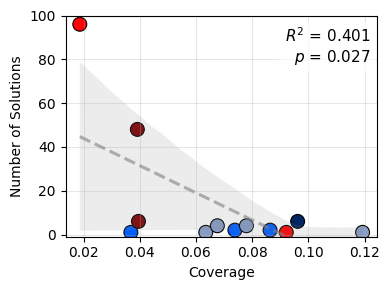

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

df = results_df.loc[results_df_filt_filt.index]

cancer_types = [
    "HGSOC TD", 
    "HGSOC FBI", 
    "HGSOC HRD-Dup",
    "TNBC FBI",
    "TNBC HRD-Dup"
]

color_map = {
    "HGSOC TD":      "#002560",  # blue
    "HGSOC FBI":     "#005EFF",  # lighter blue
    "HGSOC HRD-Dup": "#889DC5",  # even lighter blue
    "TNBC FBI":      "#FF0004",  # red
    "TNBC HRD-Dup":  "#810000",  # darker red
}

df["color"] = df["cancer_type"].map(color_map)

x = df["coverage"]
y = df["solution_count"]
slope, intercept, r_value, p_value, std_err = linregress(x, y)
r2 = r_value**2

plt.figure(figsize=(4, 3))
sns.scatterplot(
    data=df,
    x="coverage",
    y="solution_count",
    hue="cancer_type",
    s=100,
    palette=color_map,
    edgecolor="black",
    legend=False  # Hide legend here
)

sns.regplot(
    data=df,
    x="coverage",
    y="solution_count",
    scatter=False,
    color="gray",
    line_kws={"linestyle": "--", "alpha": 0.6}
)

plt.text(
    0.98, 0.95,
    f"$R^2$ = {r2:.3f}\n$p$ = {p_value:.3g}",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment="top",
    horizontalalignment="right",
    bbox=dict(facecolor="white", alpha=0.7, edgecolor="none")
)

# Labels and styling
plt.xlabel("Coverage")
plt.ylabel("Number of Solutions")
plt.ylim(-1, 100)
plt.grid(alpha=0.3)
plt.tight_layout()
# plt.savefig("../data/williams/num_solutions_vs_coverage.pdf")
plt.show()

(-1.0, 100.0)

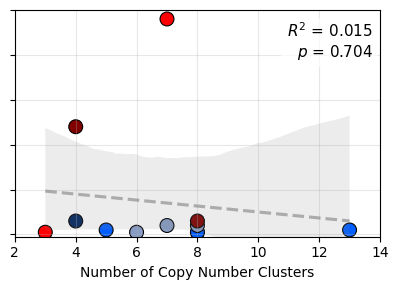

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

df = results_df.loc[results_df_filt_filt.index]

df["color"] = df["cancer_type"].map(color_map)


x = df["num_cn_clusters_in_solution"]
y = df["solution_count"]

slope, intercept, r_value, p_value, std_err = linregress(x, y)
r2 = r_value**2

plt.figure(figsize=(4, 3))
sns.scatterplot(
    data=df,
    x="num_cn_clusters_in_solution",
    y="solution_count",
    hue="cancer_type",
    s=100,
    edgecolor="black",
    palette=color_map,
)

sns.regplot(
    data=df,
    x="num_cn_clusters_in_solution",
    y="solution_count",
    scatter=False,
    color="gray",
    line_kws={"linestyle": "--", "alpha": 0.6}
)

plt.text(
    0.98, 0.95,
    f"$R^2$ = {r2:.3f}\n$p$ = {p_value:.3g}",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment="top",
    horizontalalignment="right",
    bbox=dict(facecolor="white", alpha=0.7, edgecolor="none")
)

plt.xlabel("Number of Copy Number Clusters")

plt.ylabel("")
plt.legend([], [], frameon=False)
plt.gca().set_yticklabels([])
plt.grid(alpha=0.3)
plt.tight_layout()

plt.xlim(2, 14)
plt.ylim(-1, 100)

# plt.savefig("../data/williams/num_solutions_vs_cn_clusters.svg")

In [29]:
results_df_filt_filt_2 = results_df_filt_filt[
    (results_df_filt['coverage'] < 0.08)
].sort_values('solution_count')

results_df_filt_filt_2

/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_74025/2359969638.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_df_filt_filt_2 = results_df_filt_filt[


,patient,num_cells,cancer_type,num_cn_clusters_in_solution,solution_count,num_mutations_selected,coverage,pct_mutations_selected,mean_loh
9,SA1052,556,HGSOC HRD-Dup,8,1.0,25769.0,0.063501,66.276588,0.796875
19,SA1162,254,HGSOC FBI,8,1.0,13132.0,0.036852,46.615314,0.671875
20,SA1180,774,HGSOC FBI,13,2.0,3979.0,0.073867,64.825676,0.597633
7,SA1050,990,HGSOC HRD-Dup,8,4.0,18241.0,0.067620,66.900169,0.640625
23,SA1184,621,HGSOC HRD-Dup,7,4.0,4521.0,0.077955,77.733838,0.571429
28,SA535,1801,TNBC HRD-Dup,8,6.0,20232.0,0.039547,80.228408,0.562500
26,SA501,2473,TNBC HRD-Dup,4,48.0,18625.0,0.039155,80.634687,0.625000
31,SA609,5993,TNBC FBI,7,96.0,28371.0,0.018674,64.231379,0.367347


(-1.0, 100.0)

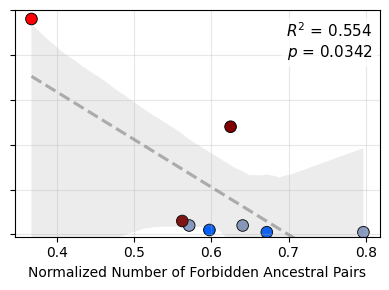

In [31]:

df = results_df.loc[results_df_filt_filt_2.index]

x = df["mean_loh"]
y = df["solution_count"]
slope, intercept, r_value, p_value, std_err = linregress(x, y)
r2 = r_value**2

df["color"] = df["cancer_type"].map(color_map)

plt.figure(figsize=(4, 3))
sns.scatterplot(
    data=df,
    x="mean_loh",
    y="solution_count",
    hue="cancer_type",
    s=70,
    edgecolor="black",
    palette=color_map,
)

sns.regplot(
    data=df,
    x="mean_loh",
    y="solution_count",
    scatter=False,
    color="gray",
    line_kws={"linestyle": "--", "alpha": 0.6}
)

plt.text(
    0.98, 0.95,
    f"$R^2$ = {r2:.3f}\n$p$ = {p_value:.3g}",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
)

plt.xlabel("Normalized Number of Forbidden Ancestral Pairs")
plt.ylabel("")
plt.legend([], [], frameon=False)

plt.gca().set_yticklabels([])

plt.grid(alpha=0.3)
plt.tight_layout()
plt.ylim(-1, 100)

# plt.savefig("../data/williams/num_solutions_vs_loh_restrictions.svg")